In [29]:
import numpy as np

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv('tr_eikon_eod_data.csv',index_col=0, parse_dates=True)

In [32]:
data = pd.DataFrame(data['AAPL.O']) 
data['Returns'] = np.log(data / data.shift())
data.dropna(inplace=True)

In [33]:
lags = 6

In [34]:
cols = []
for lag in range(1, lags + 1):
     col = 'lag_{}'.format(lag)
     data[col] = np.sign(data['Returns'].shift(lag))
     cols.append(col)
data.dropna(inplace=True)

In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC(gamma='auto') 

In [37]:
model.fit(data[cols], np.sign(data['Returns']))

SVC(gamma='auto')

In [38]:
data['Prediction'] = model.predict(data[cols]) 

In [39]:
data['Strategy'] = data['Prediction'] * data['Returns']

<Axes: xlabel='Date'>

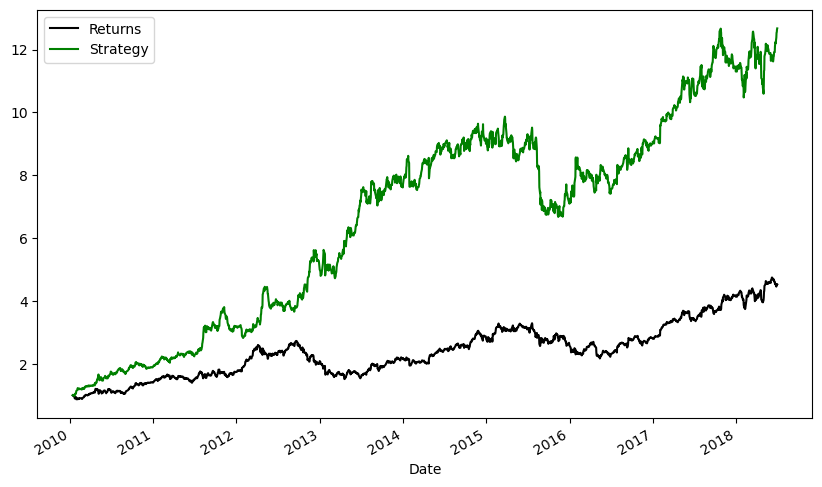

In [42]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6),
                                                          color=['black','green'])